In [ ]:
# Supprt vector classifier or (svc model)
# dataset name= spam ham dataset
# dataset = https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv

In [1]:
#1. CREATING DATAFRAME
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv",sep="\t")
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [2]:
df.info

<bound method DataFrame.info of      label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]>

In [3]:
df.shape

(5572, 4)

In [4]:
df.size

22288

In [5]:
# I want to know how many sam and ham messages are there
df["label"].value_counts()

,count
label,
ham,4825
spam,747


<Axes: xlabel='label'>

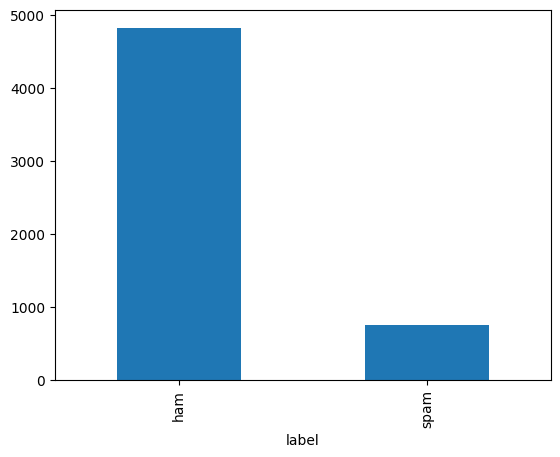

In [6]:
df["label"].value_counts().plot(kind="bar")

In [7]:
#4. Divide the data into input and output
x=df.iloc[:,1].values
y=df.iloc[:,0].values
print(x)
print(y)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [8]:
#5. train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)


In [9]:
#6. apply TF-ID vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v= vect.fit_transform(x_train)
x_test_v= vect.transform(x_test)

In [10]:
#Apply CLASSIFIER/REGRESSOR/CLUSTERER
from sklearn.svm import SVC
model= SVC()

In [11]:
#8. model fitting
model.fit(x_train_v,y_train)

SVC()

In [12]:
#9. Predictor variable/ predict the output
y_pred= model.predict(x_test_v)
y_pred        # predicted value

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [13]:
y_test        # actual value

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [14]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

98.56424982053123

In [15]:
# EVALUATING A SPECIFIC MESSAGE
a= df['message'][10]
a

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [16]:
a= vect.transform([a])
model.predict(a)

array(['ham'], dtype=object)

In [17]:
b= df['message'][12]
b

'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [18]:
b=vect.transform([b])
model.predict(b)

array(['spam'], dtype=object)

In [19]:
# EVALUATING BY TAKING CUSTOM TEXTs
c= 'win free tickets today itself'
c

'win free tickets today itself'

In [20]:
c=vect.transform([c])
model.predict(c)

array(['ham'], dtype=object)

In [21]:
# Gather data and divide into input and ouput
#2. Applied train_test_split
#3. Applied TfidfVectorizer
#4.Aplly SVC
#5. Predicted the ouptut

In [22]:
# If ever i have to deploy my model, I will have to perform pipelining
#Pipelining= combing of two or more models
# so here we want to combine or pipeline TfidfVectorizer or SVC

In [23]:
# Pipelining
from sklearn.pipeline import make_pipeline
text_model= make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [24]:
# Predictor variable
y_pred1=text_model.predict(x_test)
y_pred1

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [25]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [26]:
# to check the accuracy of the pipeline model
accuracy_score(y_pred1,y_test)*100

98.56424982053123

In [27]:
a1=df['message'][2]
a1

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [28]:
text_model.predict([a1])

array(['spam'], dtype=object)

In [29]:
# JOBLIB - 2 different types- 1. DUMP 2. LOAD
import joblib
joblib.dump(text_model,'spam-ham')
# we are creating a new file called spam ham and we are dumping our pipeline model inside it.

['spam-ham']

In [33]:
 # installing streamlit library
!pip install streamlit

In [36]:
%%writefile app.py
#%%writefile is amagic command to create app.py file
import streamlit as st
import joblib
model = joblib.load('spam-ham')
st.title('SPAM-HAM CLASSIFIER')#creates a title in web app
def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://cdn.pixabay.com/photo/2019/04/24/11/27/flowers-4151900_960_720.jpg");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url()
ip = st.text_input('Enter the message') #creates a text box in web app
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0]) # st.button create a button with name predict
  #st.title(op[0]) # the output will be displayed as a title

Overwriting app.py


In [39]:
# finding own localhost
!curl ipv4.icanhazip.com

34.136.212.253


In [40]:
#permanent deployment
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.136.212.253:8501

your url is: https://cute-houses-bathe.loca.lt
  Stopping...
^C
